<a href="https://colab.research.google.com/github/mukul-anand-bhatt/Deep_Learning/blob/main/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#divide the featires into dependent and independant features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
#concatinating these features to our data frame
X=X.drop(['Geography','Gender'],axis=1)
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train) #fit_transform is used to avoid data leakage
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

Part 2 Creating an ANN

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#Initializing an ANN
classifier=Sequential()

In [ ]:
#Adding the input Layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#Adding the first Hidden Layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [ ]:
#Adding Second Layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
#adding final layer
classifier.add(Dense(units=11,activation='sigmoid'))

In [ ]:
import tensorflow
from tensorflow.keras import optimizers
opt=optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
import tensorflow.keras.utils

# One-hot encode the y_train variable
y_train = tensorflow.keras.utils.to_categorical(y_train, 11)

# Fit the model
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000,callbacks=early_stopping)


Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.1002 - accuracy: 0.7960 - val_loss: 0.0752 - val_accuracy: 0.8228
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.0699 - accuracy: 0.8410 - val_loss: 0.0671 - val_accuracy: 0.8493
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.0652 - accuracy: 0.8569 - val_loss: 0.0693 - val_accuracy: 0.8459
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.0648 - accuracy: 0.8528 - val_loss: 0.0658 - val_accuracy: 0.8523
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.0633 - accuracy: 0.8572 - val_loss: 0.0664 - val_accuracy: 0.8489
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.0635 - accuracy: 0.8589 - val_loss: 0.0694 - val_accuracy: 0.8482
Epoch 7/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.0632 - accuracy: 0.8565 - val_loss: 0.0659 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

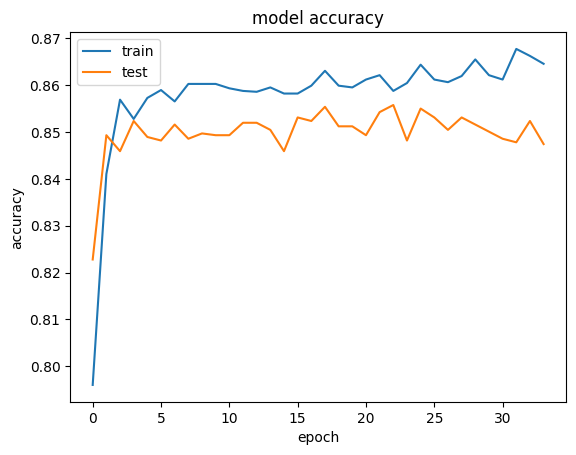

In [ ]:
 # summarize history for accuracy
plt.plot (model_history.history['accuracy' ])
plt.plot (model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel( 'epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


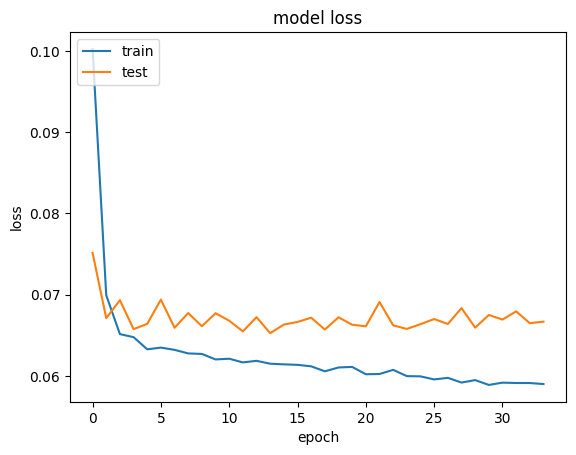

In [ ]:
 # summarize history for accuracy
plt.plot (model_history.history['loss' ])
plt.plot (model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel( 'epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


#Part 3 predictions and evaluating Model

In [ ]:
y_pred= classifier. predict(X_test)
y_pred= (y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
#checking Data type
print(y_test.dtype)
print(y_pred.dtype)

# Check Unique Values:
print(np.unique(y_test))
print(np.unique(y_pred))

# Check Shape Compatibility
print(y_test.shape)
print(y_pred.shape)

# Reshape if Necessary
if y_test.shape[1] > y_pred.shape[1]:
    y_pred = np.expand_dims(y_pred, axis=1)
elif y_pred.shape[1] > y_test.shape[1]:
    y_test = np.expand_dims(y_test, axis=1)

# Convert to Binary Format

y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

int64
int64
[0 1]
[0 1]
(2000, 1, 1, 1)
(2000, 11)


ValueError: Classification metrics can't handle a mix of unknown and multilabel-indicator targets

In [ ]:
classifier.get_weights()